# 5.3.1 Isotropic Model Results in the Frequency Domain

Numerical examples of the book  

### Introduction to Controlled-Source Electromagnetic Methods  
Anton Ziolkowski and Evert Slob, 2019, *Cambridge University Press*; ISBN: [9781107058620](https://www.cambridge.org/9781107058620).

- - -
Copyright 2018-2021 Dieter Werthmüller

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0). Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
import numpy as np
import empymod as epm
import matplotlib.pyplot as plt

%matplotlib inline

def phase(inp):
    """Shortcut for -np.unwrap(np.angle())."""
    return -np.unwrap(np.angle(inp))

## Calculation

### General model parameters

In [2]:
# Offsets
x = np.linspace(10, 1.5e4, 128)
px = x/1000  # x for plotting

# Resistivity models
rtg = [2e14, 1/3, 1, 70, 1]  # With target
rhs = [2e14, 1/3, 1, 1, 1]   # Half-space

# Common model parameters (deep sea parameters)
model = {'src': [0, 0, 975],     # Source location
         'rec': [x, x*0, 1000],  # Receiver location
         'freqtime': 0.5,        # Frequencies
         'verb': 1}              # Verbosity

### Calculate 2 half spaces: air and sea; sea and subsurface

In [3]:
# Air - sea
asTM, asTE = epm.tmtemod.dipole(depth=0, res=rhs[:2], **model)

# Water - subsurface
wsTM, wsTE = epm.tmtemod.dipole(depth=1000, res=rhs[1:3], **model)

### Calculate deep sea model

- water depth of 1000 m
- source depth 975 m
- receiver depth 1000 m

In [4]:
# Put depths into model
model['depth'] = [0, 1000, 2000, 2040]

# With reservoir
target = epm.dipole(res=rtg, **model)              # Full response
tgTM, tgTE = epm.tmtemod.dipole(res=rtg, **model)  # Split TE/TM response
tgTMt = tgTM[0]+tgTM[1]+tgTM[2]+tgTM[3]            # Total TM
tgTEt = tgTE[0]+tgTE[1]+tgTE[2]+tgTE[3]            # Total TE

# Without reservoir
notarg = epm.dipole(res=rhs, **model)              # Full response
ntTM, ntTE = epm.tmtemod.dipole(res=rhs, **model)  # Split TE/TM response
ntTMt = ntTM[0]+ntTM[1]+ntTM[2]+ntTM[3]            # Total TM
ntTEt = ntTE[0]+ntTE[1]+ntTE[2]+ntTE[3]            # Total TE

### Calculate shallow model; deep src/rec

- water depth of 100 m
- source depth 75 m
- receiver depth 100 m

In [5]:
# Adjust depths, source, and receiver
model['depth'] = [0, 100, 1100, 1140]

model['src'][2] = 75
model['rec'][2] = 100

# 1. With resevroir

# With reservoir
sdtarget = epm.dipole(res=rtg, **model)              # Full response
dtgTM, dtgTE = epm.tmtemod.dipole(res=rtg, **model)  # Split TE/TM response
dtgTMt = dtgTM[0]+dtgTM[1]+dtgTM[2]+dtgTM[3]         # Total TM
dtgTEt = dtgTE[0]+dtgTE[1]+dtgTE[2]+dtgTE[3]         # Total TE

# Without reservoir
sdnotarg = epm.dipole(res=rhs, **model)              # Full response
dntTM, dntTE = epm.tmtemod.dipole(res=rhs, **model)  # Split TE/TM response
dntTMt = dntTM[0]+dntTM[1]+dntTM[2]+dntTM[3]         # Total TM
dntTEt = dntTE[0]+dntTE[1]+dntTE[2]+dntTE[3]         # Total TE

### Calculate shallow model; shallow src/rec

- water depth of 100 m
- source depth 10 m
- receiver depth 50 m

In [6]:
# Adjust source and streamer
model['src'][2] = 10
model['rec'][2] = 50

# With reservoir
sstarget = epm.dipole(res=rtg, **model)              # Full response
stgTM, stgTE = epm.tmtemod.dipole(res=rtg, **model)  # Split TE/TM response
stgTMt = stgTM[0]+stgTM[1]+stgTM[2]+stgTM[3]         # Total TM
stgTEt = stgTE[0]+stgTE[1]+stgTE[2]+stgTE[3]         # Total TE

# Without reservoir
ssnotarg = epm.dipole(res=rhs, **model)              # Full response
sntTM, sntTE = epm.tmtemod.dipole(res=rhs, **model)  # Split TE/TM response
sntTEt = sntTE[0]+sntTE[1]+sntTE[2]+sntTE[3]         # Total TM
sntTMt = sntTM[0]+sntTM[1]+sntTM[2]+sntTM[3]         # Total TE

### Plot settings

In [7]:
def set_axis():
    """Common axis setting."""
    plt.xlabel('Offset (km)')
    plt.xlim([0, 15])
    plt.xticks([0, 5, 10, 15])
    if np.any(plt.gca().get_legend_handles_labels()):
        plt.legend()
    
    
def thin_y_ticks():
    """Hide every second y-tick label."""
    for label in plt.gca().get_yticklabels()[::2]:
        label.set_visible(False)

## Figure 5.15

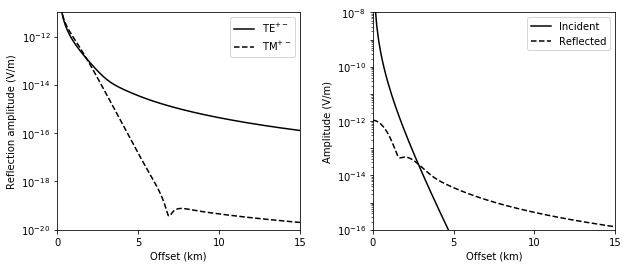

In [8]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=.3)

# 1st subplot
plt.subplot(121)
plt.semilogy(px, np.abs(asTE[2]), 'k-', label='TE$^{+-}$')
plt.semilogy(px, np.abs(asTM[2]), 'k--', label='TM$^{+-}$')
plt.ylabel('Reflection amplitude (V/m)')
set_axis()
plt.ylim([1e-20, 1e-11])

# 2nd subplot
plt.subplot(122)
plt.semilogy(px, np.abs(asTM[4]+asTE[4]), 'k-', label='Incident')
plt.semilogy(px, np.abs(asTM[2]+asTE[2]), 'k--', label='Reflected')
plt.ylabel('Amplitude (V/m)')
set_axis()
plt.ylim([1e-16, 1e-8])
thin_y_ticks()

plt.show()

Figure 5.15 Surface reflections at $f$ = 0.5 Hz in TE and TM modes (left) and incident and reflected electric fields (right).

## Figure 5.16

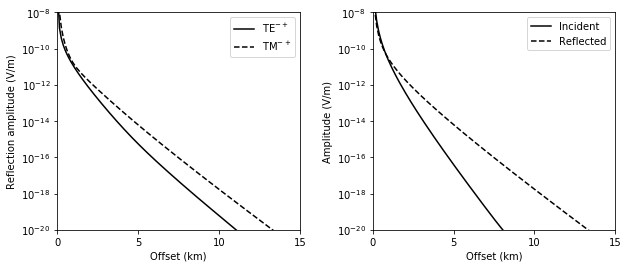

In [9]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=.3)

# 1st subplot
plt.subplot(121)
plt.semilogy(px, np.abs(wsTE[1]), 'k-', label='TE$^{-+}$')
plt.semilogy(px, np.abs(wsTM[1]), 'k--', label='TM$^{-+}$')
plt.ylabel('Reflection amplitude (V/m)')
set_axis()
plt.ylim([1e-20, 1e-8])

# 2nd subplot
plt.subplot(122)
plt.semilogy(px, np.abs(wsTM[4]+wsTE[4]), 'k-', label='Incident')
plt.semilogy(px, np.abs(wsTM[1]+wsTE[1]), 'k--', label='Reflected')
plt.ylabel('Amplitude (V/m)')
set_axis()
plt.ylim([1e-20, 1e-8])

plt.show()

Figure 5.16 Sea-floor reflections at $f$ = 0.5 Hz in TE and TM modes (left) and incident and reflected electric fields (right).

## Figure 5.17

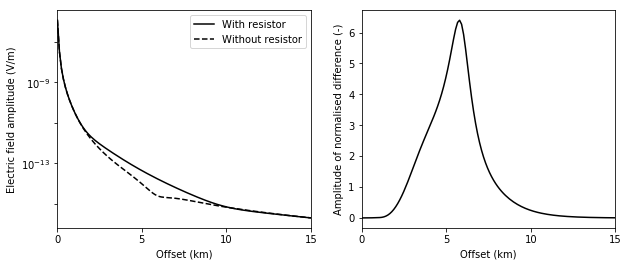

In [10]:
plt.figure(figsize=(10, 4))

# 1st subplot
plt.subplot(121)
plt.semilogy(px, np.abs(target), 'k-', label='With resistor')
plt.semilogy(px, np.abs(notarg), 'k--', label='Without resistor')
set_axis()
plt.ylabel('Electric field amplitude (V/m)')
thin_y_ticks()

# 2nd subplot
ndiff = np.abs((target-notarg)/notarg)
plt.subplot(122)
plt.plot(px, ndiff, 'k-')
plt.ylabel('Amplitude of normalised difference (-)')
set_axis()

plt.show()

Figure 5.17 Electric field amplitudes (left) and amplitude of the normalised difference (right) for $f$ = 0.5 Hz.

## Figure 5.18

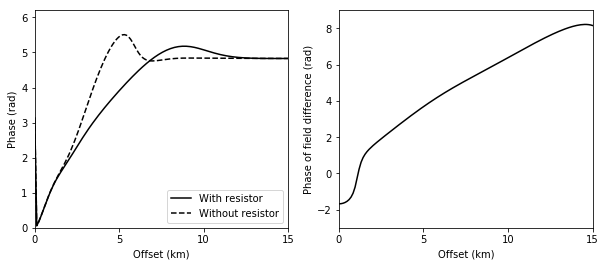

In [11]:
plt.figure(figsize=(10, 4))

# 1st subplot
plt.subplot(121)
plt.plot(px, phase(target), 'k-', label='With resistor')
plt.plot(px, phase(notarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, 6.2])

# 2nd subplot
plt.subplot(122)
plt.plot(px, phase(target-notarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9])

plt.show()

Figure 5.18 Electric field phases (left) and the phase of the difference in the fields (right).

## Figure 5.19

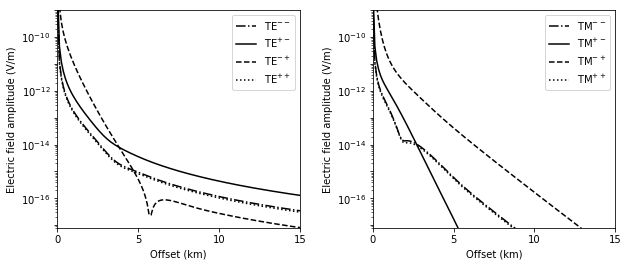

In [12]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=.3)

# 1st subplot
plt.subplot(121)
plt.semilogy(px, np.abs(tgTE[0]), 'k-.', label='TE$^{--}$')
plt.semilogy(px, np.abs(tgTE[2]), 'k-', label='TE$^{+-}$')
plt.semilogy(px, np.abs(tgTE[1]), 'k--', label='TE$^{-+}$')
plt.semilogy(px, np.abs(tgTE[3]), 'k:', label='TE$^{++}$')
set_axis()
plt.ylabel('Electric field amplitude (V/m)')
plt.ylim([8e-18, 1e-9])
thin_y_ticks()

# 2nd subplot
plt.subplot(122)
plt.semilogy(px, np.abs(tgTM[0]), 'k-.', label='TM$^{--}$')
plt.semilogy(px, np.abs(tgTM[2]), 'k-', label='TM$^{+-}$')
plt.semilogy(px, np.abs(tgTM[1]), 'k--', label='TM$^{-+}$')
plt.semilogy(px, np.abs(tgTM[3]), 'k:', label='TM$^{++}$')
set_axis()
plt.ylabel('Electric field amplitude (V/m)')
plt.ylim([8e-18, 1e-9])
thin_y_ticks()

plt.show()

Figure 5.19 Reflections in TE (left) and TM (right) modes.

## Figure 5.20

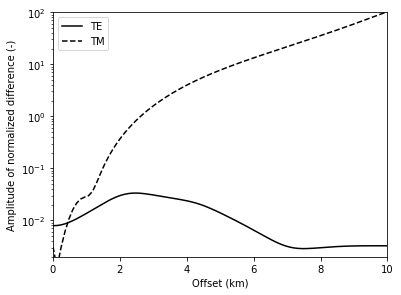

In [13]:
plt.figure(figsize=(6, 4.5))

plt.semilogy(px, np.abs((tgTEt-ntTEt)/ntTEt), 'k-', label='TE')
plt.semilogy(px, np.abs((tgTMt-ntTMt)/ntTMt), 'k--', label='TM')
plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Amplitude of normalized difference (-)')
plt.ylim([2e-3, 1e2])
plt.xlim([0, 10])

plt.show()

Figure 5.20 Amplitude of normalised difference of the reflected field in the TE (solid) and TM (dashed) modes.

## Figure 5.21

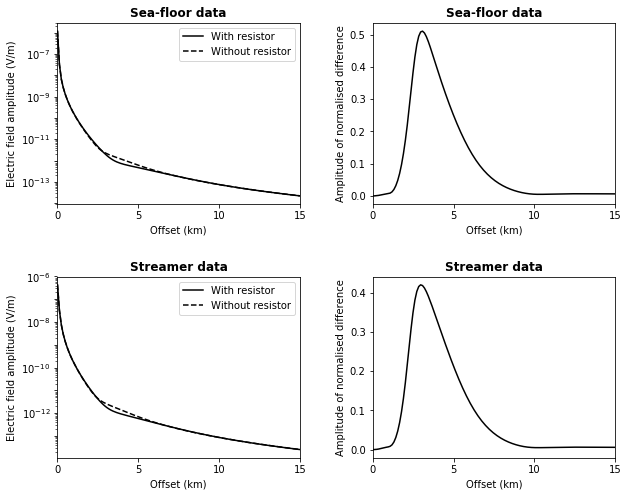

In [14]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.4)

# 1st subplot
plt.subplot(221)
plt.title('Sea-floor data', fontweight='bold')
plt.semilogy(px, np.abs(sdtarget), 'k-', label='With resistor')
plt.semilogy(px, np.abs(sdnotarg), 'k--', label='Without resistor')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
thin_y_ticks()

# 2nd subplot
plt.subplot(222)
ndiff1 = np.abs((sdtarget-sdnotarg)/sdnotarg)
plt.title('Sea-floor data', fontweight='bold')
plt.plot(px, ndiff1, 'k-')
plt.ylabel('Amplitude of normalised difference')
set_axis()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])

# 3rd subplot
plt.subplot(223)
plt.title('Streamer data', fontweight='bold')
plt.semilogy(px, np.abs(sstarget), 'k-', label='With resistor')
plt.semilogy(px, np.abs(ssnotarg), 'k--', label='Without resistor')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
thin_y_ticks()

# 4th subplot
ndiff2 = np.abs((sstarget-ssnotarg)/ssnotarg)
plt.subplot(224)
plt.title('Streamer data', fontweight='bold')
plt.plot(px, ndiff2, 'k-')
plt.ylabel('Amplitude of normalised difference')
set_axis()
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])

plt.show()

Figure 5.21 Electric field amplitudes (left) and amplitude of the normalised difference (right) for the deep source and sea floor receivers (top) and shallow sources and towed receivers (bottom); $f$ = 0.5 Hz.

## Figure 5.22

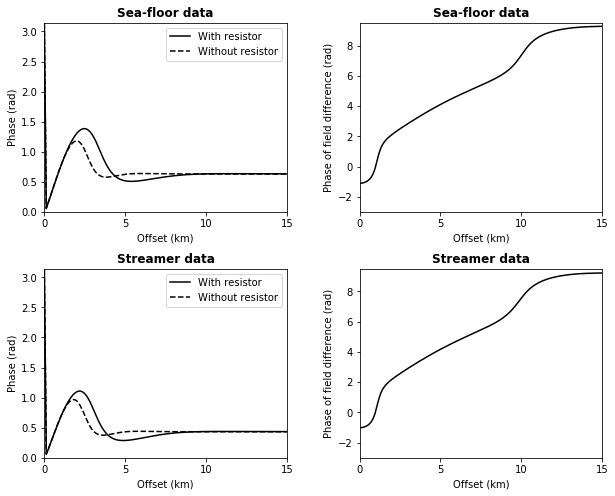

In [15]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.3)

# 1st subplot
plt.subplot(221)
plt.title('Sea-floor data', fontweight='bold')
plt.plot(px, phase(sdtarget), 'k-', label='With resistor')
plt.plot(px, phase(sdnotarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, np.pi])

# 2nd subplot
plt.subplot(222)
plt.title('Sea-floor data', fontweight='bold')
plt.plot(px, phase(sdtarget-sdnotarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9.5])

# 3rd subplot
plt.subplot(223)
plt.title('Streamer data', fontweight='bold')
plt.plot(px, phase(sstarget), 'k-', label='With resistor')
plt.plot(px, phase(ssnotarg), 'k--', label='Without resistor')
plt.ylabel('Phase (rad)')
set_axis()
plt.ylim([0, np.pi])

# 4th subplot
plt.subplot(224)
plt.title('Streamer data', fontweight='bold')
plt.plot(px, phase(sstarget-ssnotarg), 'k-')
plt.ylabel('Phase of field difference (rad)')
set_axis()
plt.ylim([-3, 9.5])

plt.show()

Figure 5.22 Electric field phases (left) and the phase of the difference in the fields (right) for the deep source and sea-floor receivers (top) and shallow sources and towed receivers (bottom).

## Figure 5.23

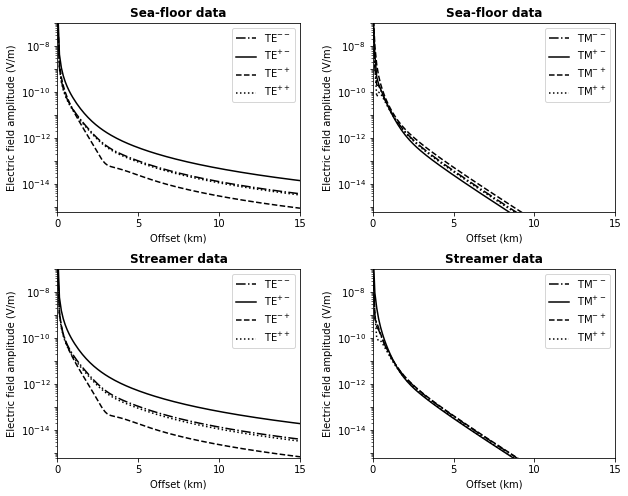

In [16]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.3, hspace=.3)
plt.ylim([6e-16, 1e-7])

# 1st subplot
plt.subplot(221)
plt.title('Sea-floor data', fontweight='bold')
plt.semilogy(px, np.abs(dtgTE[0]), 'k-.', label='TE$^{--}$')
plt.semilogy(px, np.abs(dtgTE[2]), 'k-', label='TE$^{+-}$')
plt.semilogy(px, np.abs(dtgTE[1]), 'k--', label='TE$^{-+}$')
plt.semilogy(px, np.abs(dtgTE[3]), 'k:', label='TE$^{++}$')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
plt.ylim([6e-16, 1e-7])
thin_y_ticks()

# 2nd subplot
plt.subplot(222)
plt.title('Sea-floor data', fontweight='bold')
plt.semilogy(px, np.abs(dtgTM[0]), 'k-.', label='TM$^{--}$')
plt.semilogy(px, np.abs(dtgTM[2]), 'k-', label='TM$^{+-}$')
plt.semilogy(px, np.abs(dtgTM[1]), 'k--', label='TM$^{-+}$')
plt.semilogy(px, np.abs(dtgTM[3]), 'k:', label='TM$^{++}$')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
plt.ylim([6e-16, 1e-7])
thin_y_ticks()

# 3rd subplot
plt.subplot(223)
plt.title('Streamer data', fontweight='bold')
plt.semilogy(px, np.abs(stgTE[0]), 'k-.', label='TE$^{--}$')
plt.semilogy(px, np.abs(stgTE[2]), 'k-', label='TE$^{+-}$')
plt.semilogy(px, np.abs(stgTE[1]), 'k--', label='TE$^{-+}$')
plt.semilogy(px, np.abs(stgTE[3]), 'k:', label='TE$^{++}$')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
plt.ylim([6e-16, 1e-7])
thin_y_ticks()

# 4th subplot
plt.subplot(224)
plt.title('Streamer data', fontweight='bold')
plt.semilogy(px, np.abs(stgTM[0]), 'k-.', label='TM$^{--}$')
plt.semilogy(px, np.abs(stgTM[2]), 'k-', label='TM$^{+-}$')
plt.semilogy(px, np.abs(stgTM[1]), 'k--', label='TM$^{-+}$')
plt.semilogy(px, np.abs(stgTM[3]), 'k:', label='TM$^{++}$')
plt.ylabel('Electric field amplitude (V/m)')
set_axis()
plt.ylim([6e-16, 1e-7])
thin_y_ticks()

plt.show()

Figure 5.23 Reflections in TE (left) and TM (right) modes for the deep source and sea-floor receivers (top) and shallow sources and towed receivers (bottom).

## Figure 5.24

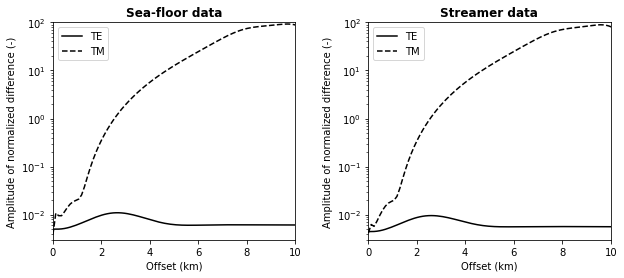

In [17]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=.3)

# 1st subplot
plt.subplot(121)
plt.title('Sea-floor data', fontweight='bold')
plt.semilogy(px, np.abs((dtgTEt-dntTEt)/dntTEt), 'k-', label='TE')
plt.semilogy(px, np.abs((dtgTMt-dntTMt)/dntTMt), 'k--', label='TM')
plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Amplitude of normalized difference (-)')
plt.xlim([0, 10])
plt.ylim([3e-3, 1e2])

# 2nd subplot
plt.subplot(122)
plt.title('Streamer data', fontweight='bold')
plt.semilogy(px, np.abs((stgTEt-sntTEt)/sntTEt), 'k-', label='TE')
plt.semilogy(px, np.abs((stgTMt-sntTMt)/sntTMt), 'k--', label='TM')
plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Amplitude of normalized difference (-)')
plt.ylim([3e-3, 1e2])
plt.xlim([0, 10])

plt.show()

Figure 5.24 Amplitude of normalised difference of the reflected field in the TE (solid) and TM (dashed) modes for the deep source and sea-floor receivers (left) and shallow sources and towed receivers (right).

In [18]:
epm.Report()

--------------------------------------------------------------------------------
  Date: Tue Jul 13 16:47:56 2021 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GiB
       Environment : Jupyter

  Python 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27)
  [GCC 9.3.0]

             numpy : 1.20.2
             scipy : 1.7.0
             numba : 0.53.0
           empymod : 2.1.2
           IPython : 7.23.1
        matplotlib : 3.4.2

  Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------